In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [52]:
X= np.array(df.drop(columns= ['Outcome']))
y= np.array(df['Outcome'])

In [53]:
y_adj= np.where(y>0, 1, -1)

In [54]:
avg= np.mean(X, axis=0)
dev= np.std(X, axis=0)
X_rescaled= (X- avg)/dev
print(X[0])
X_rescaled[0]

[  6.    98.    58.    33.   190.    34.     0.43  43.  ]


array([ 0.63994726, -0.71653347, -0.57412775,  0.7818138 ,  0.95685965,
        0.25478047, -0.1264714 ,  0.83038113])

In [122]:
X.shape

(768, 8)

In [135]:
learning_rate= 0.0001
lamda= 0.001
iterations=1000

In [136]:
def fit(X, y, w, b):
    costs=[]
    for p in range(iterations):
        for i, x in enumerate(X):
            cond= (y[i] * (np.dot(x, w)+b))>=1
            if cond:
                w-= learning_rate*(2* lamda* w)
            else:
                w-= learning_rate*(2*lamda*w- y[i]*x)
                b+= learning_rate*y[i]
        regularisation= lamda * np.dot(w,w)
        hinge_loss= np.mean(np.maximum(0, 1- y * (np.dot(X, w) + b)))
        cost= regularisation+ hinge_loss
        if(p%100==0):
            print(f"Iteration {p}: Cost {cost:.4f}")
        costs.append(cost)
    return w,b, costs
    

In [137]:
def predict(X, w, b):
    y_pred= np.dot(w, X) +b
    return np.sign(y_pred)

In [138]:
m,n= X.shape
w= np.zeros(n)
b=0

In [139]:
w_final, b_final, cost_arr= fit(X_rescaled[:700, :], y_adj[:700], w,b)
X_test= X_rescaled[700:, :]
y_pred= predict(X_test.T, w_final, b_final)
print(y_adj[700:])
y_pred

Iteration 0: Cost 0.9635
Iteration 100: Cost 0.5247
Iteration 200: Cost 0.5216
Iteration 300: Cost 0.5210
Iteration 400: Cost 0.5209
Iteration 500: Cost 0.5209
Iteration 600: Cost 0.5208
Iteration 700: Cost 0.5208
Iteration 800: Cost 0.5208
Iteration 900: Cost 0.5208
[-1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1
 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1]


array([-1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1., -1.])

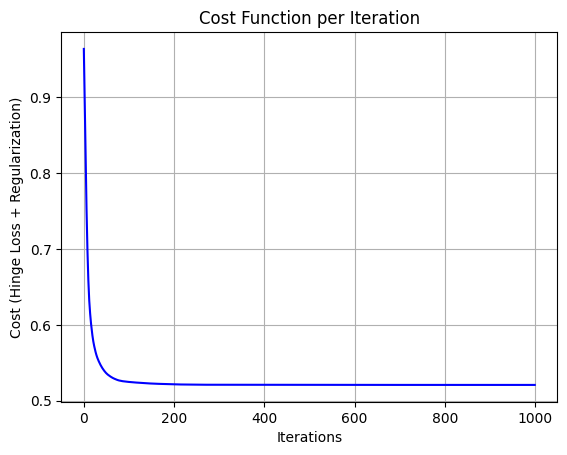

In [140]:
plt.plot(range(iterations), cost_arr, color='blue')
plt.title('Cost Function per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost (Hinge Loss + Regularization)')
plt.grid(True)
plt.show()

In [141]:
accuracy = np.mean(y_pred == y_adj[700:])
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.41%


In [143]:
y_test= y_adj[700:]
tp= np.sum((y_pred==1) & (y_test==1))
tn= np.sum((y_pred==-1) & (y_test==-1))
fp= np.sum((y_pred==1) & (y_test==-1))
fn= np.sum((y_pred==-1) & (y_test==1))

In [148]:
precision= tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
accuracy = (tp + tn) / len(y_test)
print(f"Confusion Matrix:  TP: {tp} , FP: {fp} , FN: {fn} , TN: {tn}")

Confusion Matrix:  TP: 15 , FP: 3 , FN: 11 , TN: 39


In [149]:
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1_score:.4f}")

Accuracy:  0.7941
Precision: 0.8333
Recall:    0.5769
F1-Score:  0.6818
